In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Classificator
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

x1 = heart_disease.drop("target", axis=1)
y1 = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train1, y_train1)
y_pred1 = clf1.predict(x_test1)

In [3]:
y_probs = clf1.predict_proba(x_test1)

In [5]:
# AUC - Use this when one answer appears much more often than the other  (Don't work on Regressor)
from sklearn.metrics import roc_curve

y_probs_positive = y_probs[:, 1]

fpr, tpr, threskolds = roc_curve(y_test1, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03846154, 0.07692308, 0.07692308, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.23076923, 0.26923077, 0.26923077, 0.42307692, 0.46153846,
       0.46153846, 0.5       , 0.53846154, 0.76923077, 0.84615385,
       1.        ])

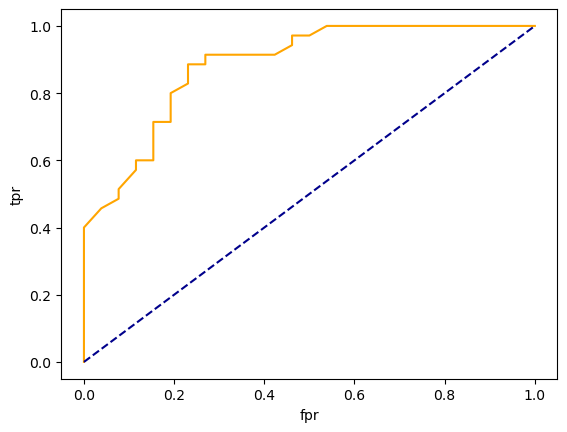

In [6]:
# Drawing Roc Curve (Normally not necessary)
def plot_roc_curve(fpr, tpr):

    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("fpr")
    plt.ylabel("tpr")

plot_roc_curve(fpr, tpr);
